In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
train_dataset = datasets.MNIST(root='./num/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='./num/',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

tensor(0.1290) tensor(1.) tensor(0.) torch.Size([64, 1, 28, 28])


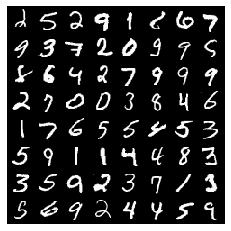

In [3]:
images, labels = next(iter(train_loader))
print(images.mean(), images.max(), images.min(), images.size())

img = torchvision.utils.make_grid(images, nrow=8)
img = img.numpy().transpose(1, 2, 0)

plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
# vae
# cvae
# sbvae

# gan
# wgan
# cwgan mix-gan

epoch: 0, loss: 6097.026367, recon_loss: 5722.401367, KLD: 374.624817


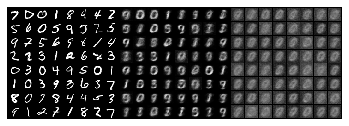

epoch: 1, loss: 5237.585449, recon_loss: 4702.735352, KLD: 534.850037


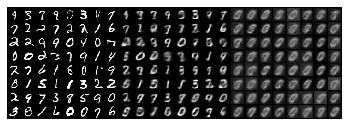

epoch: 2, loss: 4984.261719, recon_loss: 4411.191406, KLD: 573.070190


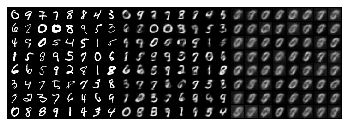

epoch: 3, loss: 4858.239258, recon_loss: 4227.839844, KLD: 630.399292


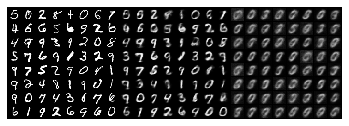

epoch: 4, loss: 4589.364258, recon_loss: 3876.494141, KLD: 712.870117


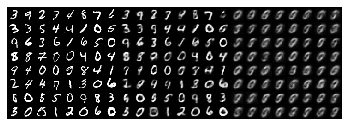

epoch: 5, loss: 4424.736328, recon_loss: 3727.253906, KLD: 697.482178


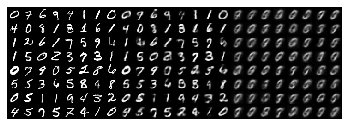

epoch: 6, loss: 4277.534668, recon_loss: 3568.871094, KLD: 708.663452


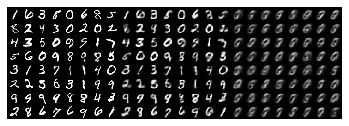

epoch: 7, loss: 4313.817871, recon_loss: 3631.779785, KLD: 682.038208


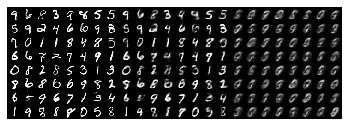

epoch: 8, loss: 4190.841797, recon_loss: 3440.545410, KLD: 750.296265


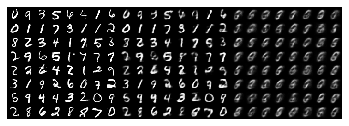

epoch: 9, loss: 3990.228516, recon_loss: 3220.662598, KLD: 769.565918


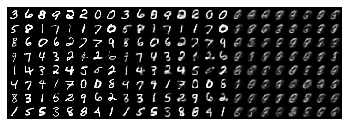

epoch: 10, loss: 3961.326172, recon_loss: 3204.049805, KLD: 757.276489


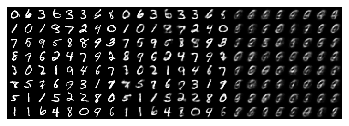

epoch: 11, loss: 4015.665039, recon_loss: 3244.029297, KLD: 771.635864


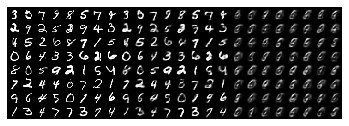

epoch: 12, loss: 3804.420898, recon_loss: 3041.753174, KLD: 762.667847


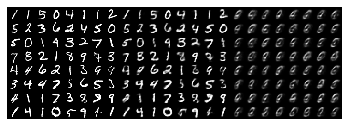

epoch: 13, loss: 3608.146484, recon_loss: 2861.942627, KLD: 746.203857


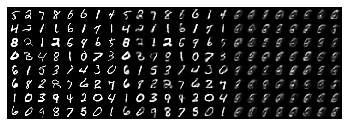

epoch: 14, loss: 3553.544922, recon_loss: 2759.118896, KLD: 794.425903


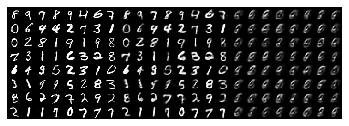

epoch: 15, loss: 3713.902344, recon_loss: 2936.290527, KLD: 777.611938


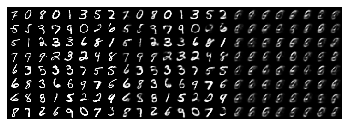

epoch: 16, loss: 4050.173828, recon_loss: 3221.185791, KLD: 828.988037


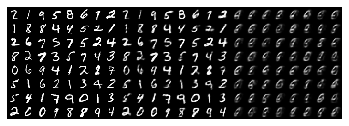

epoch: 17, loss: 3385.495117, recon_loss: 2626.822021, KLD: 758.673096


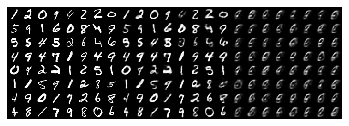

epoch: 18, loss: 3766.337891, recon_loss: 2995.648926, KLD: 770.689026


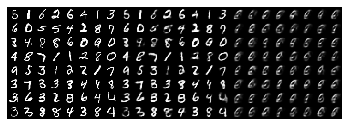

epoch: 19, loss: 3528.319336, recon_loss: 2762.127930, KLD: 766.191284


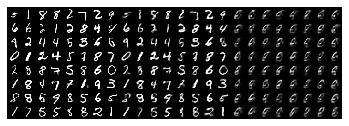

epoch: 20, loss: 3345.077637, recon_loss: 2581.533691, KLD: 763.543945


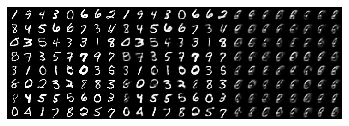

epoch: 21, loss: 3438.034668, recon_loss: 2680.851562, KLD: 757.183044


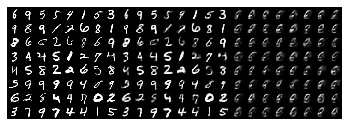

epoch: 22, loss: 3511.848145, recon_loss: 2723.809814, KLD: 788.038330


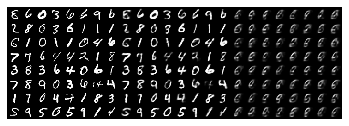

epoch: 23, loss: 3990.837158, recon_loss: 3118.784668, KLD: 872.052490


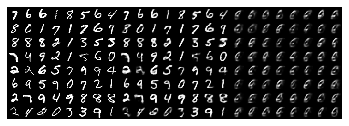

epoch: 24, loss: 3726.268066, recon_loss: 2883.248535, KLD: 843.019592


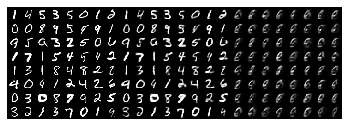

epoch: 25, loss: 3718.016602, recon_loss: 2927.417480, KLD: 790.598999


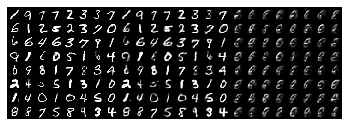

epoch: 26, loss: 3604.399658, recon_loss: 2818.694580, KLD: 785.705139


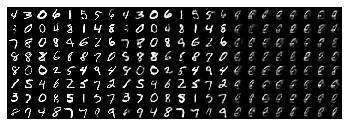

epoch: 27, loss: 3472.115723, recon_loss: 2670.644043, KLD: 801.471802


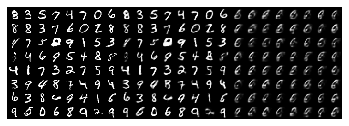

epoch: 28, loss: 3458.002441, recon_loss: 2664.421631, KLD: 793.580811


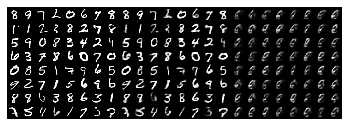

epoch: 29, loss: 3503.539795, recon_loss: 2678.563965, KLD: 824.975769


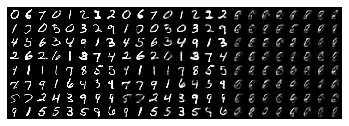

In [10]:
class VAE(nn.Module):
    def __init__(self, x_dim1, x_dim2, h_dim, z_dim):
        super(VAE, self).__init__()
        
        self.x_dim1 = x_dim1
        self.x_dim2 = x_dim2
        self.z_dim = z_dim
        
        # encoder
        # todo: conv pool relu bn
        self.fc1 = nn.Linear(x_dim1 * x_dim2, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim) # for mu
        self.fc3 = nn.Linear(h_dim, z_dim) # for logs2
        
        # decoder
        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, x_dim1 * x_dim2)
    
    def encode(self, x):
        """
        :param: x: input vector, size: (B, C, H, W)
        :return: mu, logs2: parameters of Gaussian distribution of latent variable z
        """
        x = x.view(-1, self.x_dim1 * self.x_dim2)
        h = F.relu(self.fc1(x))
        mu = self.fc2(h)
        logs2 = self.fc3(h) 
        return mu, logs2
    
    def sample_from_gauss(self, mu, logs2):
        """
        :param: mu, logs2: mean and log(std^2) of Gaussian distrubution
        :return: z: the sampled result
        """
        std = torch.exp(logs2 * 0.5)
        eps = torch.randn_like(std)
        return mu + std * eps
        
    
    def decode(self, z):
        """
        :param: z: latent variable z
        :return: x: the reconstructed vector, size: (B, C, H, W)
        """
        h = F.relu(self.fc4(z))
        x = torch.sigmoid(self.fc5(h)) 
        x = x.view(-1, 1, self.x_dim1, self.x_dim2)
        return x
    
    def forward(self, x):
        mu, logs2 = self.encode(x)
        z = self.sample_from_gauss(mu, logs2)
        x = self.decode(z)
        return x, mu, logs2

    
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
LR = 1e-4

vae = VAE(x_dim1=28, x_dim2=28, h_dim=256, z_dim=64).to(device)
optimizer = optim.Adam(
    vae.parameters(),
    lr=LR,
)

epoch = 30


def loss_func(recon_x, inputs, mu, logs2):
    reconstruction_loss = F.binary_cross_entropy(recon_x, inputs, reduction='sum') # keypoint

    divergence = 0.5 * torch.sum(torch.exp(logs2) + torch.pow(mu, 2) - 1. - logs2)

    loss = reconstruction_loss + divergence

    return loss, reconstruction_loss, divergence


for epo in range(epoch):
    for i, data in enumerate(train_loader):
        inputs = data[0].to(device)

        res, mu, logs2 = vae(inputs)

        loss, recon_loss, KLD = loss_func(res, inputs, mu, logs2)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
    print("epoch: {}, loss: {:3f}, recon_loss: {:3f}, KLD: {:3f}".format(epo, loss.item(), recon_loss.item(), KLD.item()))
    
    # reconstruct images from test data
    xs = iter(test_loader).next()[0].to(device)
    origin_grid = torchvision.utils.make_grid(xs).cpu().numpy().transpose(1, 2, 0)
    
    reconstructed, _, _ = vae(xs)
    reconstructed_grid = torchvision.utils.make_grid(reconstructed).cpu().detach().numpy().transpose(1, 2, 0)
    
    # generate images from noise
    zs = torch.rand(64, 64).to(device)
    generated = vae.decode(zs)
    generated_grid = torchvision.utils.make_grid(generated).cpu().detach().numpy().transpose(1, 2, 0)
    
    img = np.hstack([origin_grid, reconstructed_grid, generated_grid])
    plt.imshow(img)
    plt.axis('off')
    plt.show()